In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"], axis=1, inplace=True)

In [29]:
import warnings
warnings.filterwarnings("ignore")

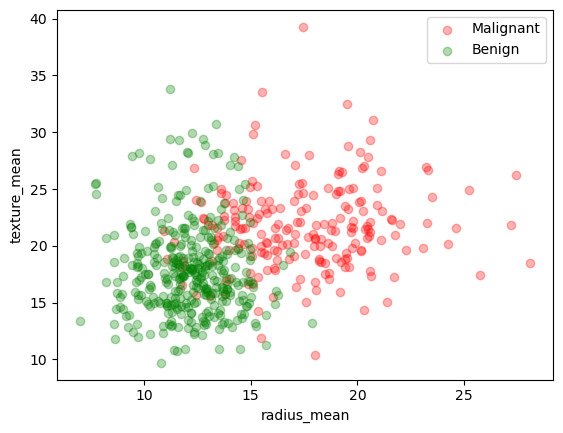

In [30]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Malignant",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Benign",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [31]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
x_data = x_data.iloc[:, [0,1]]
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_data,y,test_size = 0.25,random_state = 39)

In [33]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree_classification = DecisionTreeClassifier(random_state=0, criterion = 'entropy')#max_depth=1 gives 0.91 accuracy but makes linear classification so i left it on default 
tree_classification.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
y_pred = tree_classification.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of decision tree classification: {}".format(accuracy))

Accuracy of decision tree classification: 0.8601398601398601


In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[76 15]
 [ 5 47]]


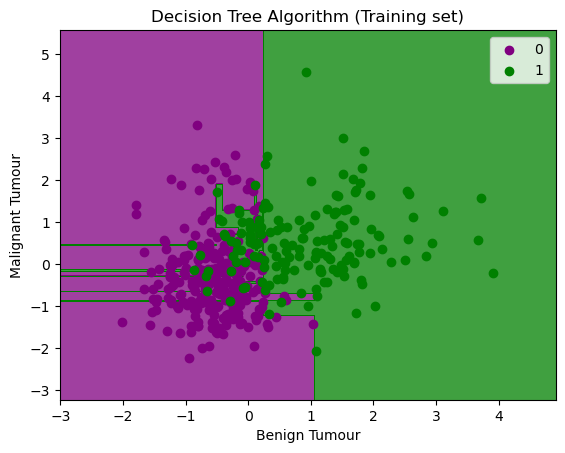

In [38]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, tree_classification.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], color = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Decision Tree Algorithm (Training set)')  
plt.xlabel('Benign Tumour')  
plt.ylabel('Malignant Tumour')  
plt.legend()  
plt.show()

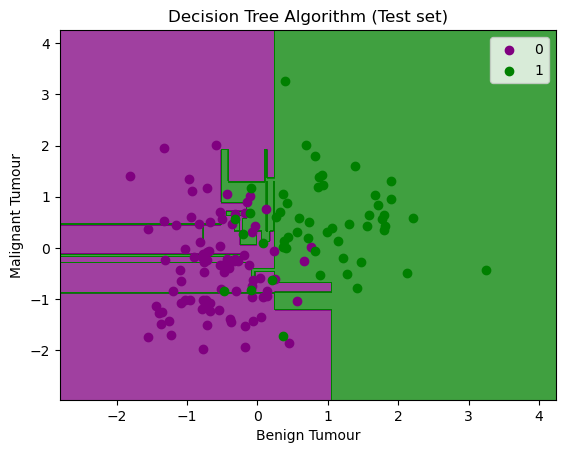

In [39]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, tree_classification.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], color = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Decision Tree Algorithm (Test set)')  
plt.xlabel('Benign Tumour')  
plt.ylabel('Malignant Tumour')  
plt.legend()  
plt.show()